**Умова:**
    
Використовуючи дані із файлу petrol_consumption.csv побудуйте модель множинної регресії для знаходження залежностей між значеннями споживання бензину і похідними факторами. Оцініть якість отриманної регресії.

**1.Отримаємо дані з файлу**

In [79]:
import pandas as pd

df = pd.read_csv('petrol_consumption.csv')
df

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.00,3571,1976,0.525,541
1,9.00,4092,1250,0.572,524
2,9.00,3865,1586,0.580,561
3,7.50,4870,2351,0.529,414
4,8.00,4399,431,0.544,410
5,10.00,5342,1333,0.571,457
6,8.00,5319,11868,0.451,344
7,8.00,5126,2138,0.553,467
8,8.00,4447,8577,0.529,464
9,7.00,4512,8507,0.552,498


**2. Проаналізуємо залежності між значеннями даних**

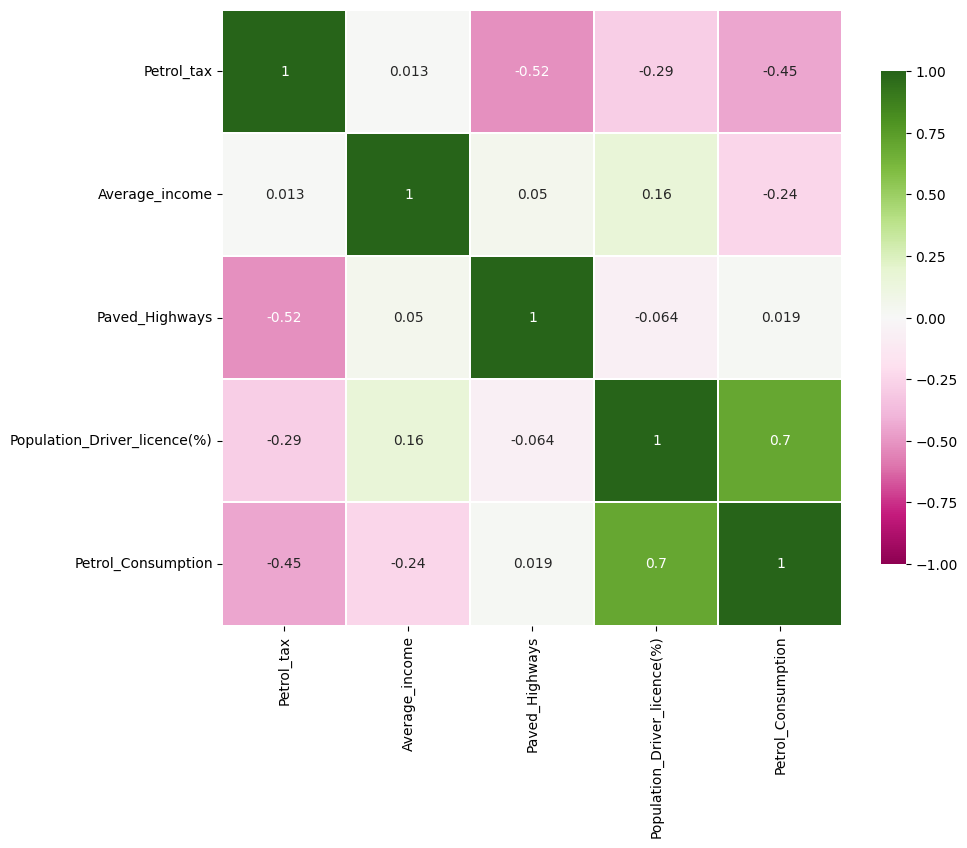

In [80]:
import seaborn as sb
import matplotlib.pyplot as plt

correlation_df = df.corr()
fig, ax = plt.subplots(figsize=(10, 8))
sb.heatmap(correlation_df, cmap="PiYG", vmin=-1, vmax=1, linewidth=0.3, cbar_kws={'shrink': .8}, annot=True)
plt.show()

Можна зробити висновок, що на параметр **Petrol_Consumption** найменше впливає параметр **Paved_Higways** (приблизно 2%). Тому використовувати цей параметр не має сенсу:

In [81]:
df = df.drop(['Paved_Highways'], axis=1)

**3. Побудуємо модель множинної регресії**

In [84]:
from sklearn import linear_model

predictors = list(df.head(0).iloc[:, :-1])
outcome = 'Petrol_Consumption'

model_tax = linear_model.LinearRegression()
model_tax.fit(df[predictors], df[outcome])

print(f'Intercept: {model_tax.intercept_:.3f}')
print("Regression coeficients: ")
for name, coef in zip(predictors, model_tax.coef_):
    print(f'{name}: {coef:.4f}')
    


Intercept: 307.328
Regression coeficients: 
Petrol_tax: -29.4838
Average_income: -0.0680
Population_Driver_licence(%): 1374.7684


**4. Оцінмио якість регресії за допомогою показників RMSE та 𝑅2**

In [85]:
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score

fitted = model_tax.predict(df[predictors])

RMSE = np.sqrt(mean_squared_error(df[outcome], fitted))   
r2 = r2_score(df[outcome], fitted)                         

print(f'RMSE: {RMSE:.2f}')
print(f'r2: {r2:.4f}')

RMSE: 63.13
r2: 0.6749


**Враховуючи низький показник коефіцієнта детермінації, можна зробити висновок, що модель має невисокий рівень точності. Для покращення моделі необхідно добавити дані, які більш скорельовані із параметром, що досліджується.**